In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import randrange

In [9]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
len(x_train),len(x_test)


(60000, 10000)

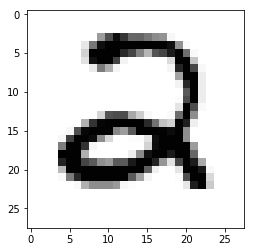

In [14]:
first_image=x_train[randrange(0,len(x_train))]
first_image=np.array(first_image,dtype='float')
#print(first_image.shape())
pixels=first_image.reshape((28,28))

plt.imshow(pixels,cmap='Greys')
plt.show()

In [14]:
# convert the samples from integers to floating point numbers

x_train,x_test=x_train/255.0,x_test/255.0

In [32]:
# build the model
# sequential: creates a linear stack of layer

model=tf.keras.models.Sequential([
    # flatten the input
    tf.keras.layers.Flatten(input_shape=(28,28)),
    
    #density conected NN layer
    #implements the operation:output=activation(dot(input,kernel)+bias)
    #activation is element-wise activation function which is passed as an argument
    #kernel is a weights matrix created by layer
    #bias vector created by layer(if use_bias=true)
    #nn=neural network
    # instead of relu we can use sigmoid or tanh
    tf.keras.layers.Dense(1024,activation=tf.nn.tanh),
    
    #dropout is regularization technique
    #randomly selected neurons are ignored during training
    #their contribution to activation of downstrean neurons and
    #any weights applied are not applieed to the neuron in the backward pass
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
# inplace of adam we can use sgd(stipest gradient descent)
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [33]:
model.fit(x_train,y_train,epochs=5)

model.evaluate(x_test,y_test)

Epoch 1/5
60000/60000 [==============================] - 17s 280us/sample - loss: 0.5432 - acc: 0.8591
Epoch 2/5
60000/60000 [==============================] - 17s 278us/sample - loss: 0.3457 - acc: 0.9021
Epoch 3/5
60000/60000 [==============================] - 17s 280us/sample - loss: 0.3168 - acc: 0.9097
Epoch 4/5
60000/60000 [==============================] - 17s 282us/sample - loss: 0.3010 - acc: 0.9150
Epoch 5/5
10000/10000 [==============================] - 1s 137us/sample - loss: 0.2761 - acc: 0.9219


[0.2760631847411394, 0.9219]